# Lab 04: Aliasing of digital sampling

In [1]:
import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

import matplotlib.pyplot as plt
import numpy as np

## Aliasing: Trianglar sound wave

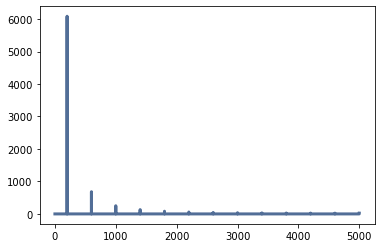

In [2]:
frequency = 200
framerate = 10000

triangle_sig = thinkdsp.TriangleSignal(freq=frequency, amp=1, offset=0)
triangle_wave = triangle_sig.make_wave(duration=1.5, start=0, framerate=framerate)
sp = triangle_wave.make_spectrum()
sp.plot()

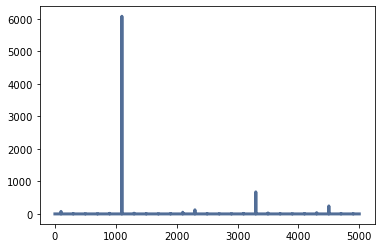

In [3]:
frequency = 1100
framerate = 10000

triangle_sig = thinkdsp.TriangleSignal(freq=frequency, amp=1, offset=0)
triangle_wave = triangle_sig.make_wave(duration=1.5, start=0, framerate=framerate)
sp = triangle_wave.make_spectrum()
sp.plot()

## Nyquist’s Theorem

A frequency which is greater than half the sample frequency gets reflected through half the sample frequency, so that it sounds like a frequency of the corresponding amount less than half.

<img src="aliasing.png">

In [11]:
frameRate = 10.0
frequency = 2.0
phase = 0
showSin = True

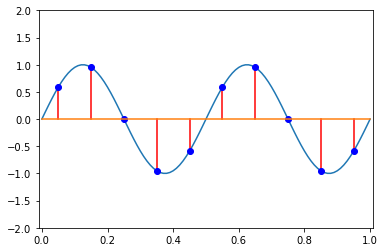

In [12]:
amplitude = 1.0

x = np.arange(0,1.01,0.01)   # start,stop,step
k = 2 * np.pi * frequency
y = amplitude * np.sin(k*x + phase)

ks = 2 * np.pi * frameRate
xs = np.arange(0+1/(2*frameRate),1,1/frameRate)
ys = amplitude * np.sin(k*xs + phase)

if showSin:
    plt.plot(x,y)
for i in range(len(xs)):
    plt.plot([xs[i],xs[i]],[0,ys[i]],'r')
    plt.plot(xs[i], ys[i],'bo')
plt.plot([0,1],[0,0])
plt.axis([-0.01,1.01,-2,2])
plt.show()

## Aliasing: a single cosine sound wave

In [ ]:
frequency = 1500
framerate = 5000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

In [ ]:
sp = cos_wave.make_spectrum()
sp.plot()

In [ ]:
frequency = 3500
framerate = 5000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

In [ ]:
sp = cos_wave.make_spectrum()
sp.plot()

In [ ]:
frequency = 3500
framerate = 10000

cos_signal = thinkdsp.CosSignal(frequency)
cos_wave = cos_signal.make_wave(duration=1.5, framerate=framerate)
cos_wave.make_audio()

In [ ]:
sp = cos_wave.make_spectrum()
sp.plot()

## Aliasing: Chirp

In [ ]:
def half_framerate(w):
    fr = w.framerate/2
    l = round(len(w.ys)/2)
    ys = [0.0]*l
    ts = [0.0]*l
    for i in range(l):
        ys[i] = w.ys[i*2]
        ts[i] = w.ts[i*2]
    w2 = thinkdsp.Wave(ys,ts,fr)
    return(w2)

In [ ]:
signal = thinkdsp.Chirp(start=2000, end=3000)
wave = signal.make_wave(duration=3, framerate=10000)
wave.make_audio()

In [ ]:
wave_half = half_framerate(wave)
wave_half.make_audio()

In [ ]:
print(wave_half.framerate)

## Aliasing: wave file

### Read wave file

In [ ]:
wave = thinkdsp.read_wave("triangle_mod_200Hz.wav")
wave.make_audio()

In [ ]:
sp = wave.make_spectrum()
sp.plot(high=2500)

Note that the components of frequencies higher than 3000 have been removed.

In [ ]:
print(wave.framerate)

In [ ]:
seg = wave.segment(0,0.01)
seg.plot()

### Reduce framerate

In [ ]:
wave_half = half_framerate(wave)
wave_half.make_audio()

In [ ]:
print(wave_half.framerate)

### Note the aliasing

In [ ]:
sp_half = wave_half.make_spectrum()
sp_half.plot(high=2500)